In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [4]:
from mppi import InputFiles as I, Calculators as C, Utilities as U, Parsers as P
import matplotlib.pyplot as plt
import os

In [5]:
omp = 1
mpi = 4

# Tutorial of the YamboParser class

This tutorial describes the usage of the YamboParser class. The parser contains instances 
of several classes, namely : 
* the YamboOutputParser that deals with the o- file(s) produced by a yambo computation
* the YamboDipolesParser that parse the dipoles database created by Yambo
* the YamboDftParser that extract lattice and electronic information (ad the dft level) from the
  ns.db1 database written by Yambo in the SAVE folder

The class is designed to deal with the output of the run method of YamboCalculator.

Here we present a first example by performing a gw calculation:

In [264]:
code = C.YamboCalculator(omp=omp,mpi=mpi)

Initialize a Yambo calculator with scheduler direct


In [265]:
source_dir = 'QeCalculator_test/bands_8.save'
run_dir = 'YamboCalculator_test'

In [266]:
U.build_SAVE(source_dir,run_dir)

SAVE folder already present in YamboCalculator_test. No operations performed.


In [267]:
inp = I.YamboInput(args='yambo -d -k hartee -g n -p p -V qp',folder=run_dir)
inp.set_kRange(1,2)
#inp

In [268]:
results = code.run(input = inp, run_dir = run_dir, name='qp_test1')
results

Skip the run of qp_test1


{'output': ['YamboCalculator_test/qp_test1/o-qp_test1.qp'],
 'dft': 'YamboCalculator_test/SAVE/ns.db1',
 'pp': 'YamboCalculator_test/qp_test1/ndb.pp',
 'QP': 'YamboCalculator_test/qp_test1/ndb.QP',
 'HF_and_locXC': 'YamboCalculator_test/qp_test1/ndb.HF_and_locXC',
 'dipoles': 'YamboCalculator_test/qp_test1/ndb.dipoles'}

The calculator contain the references to the o- files and database with the output data.
The parser extract the data from the files, as follows

In [269]:
P.YamboParser?

Init signature: P.YamboParser(results, verbose=False, extendOut=True)
Docstring:     
Class that perform the parsing starting from the results :py:class:`dict` built
by the :class:`YamboCalculator` class. In the actual implementation of the class the
parser is able to deal with the o- files, the dipoles database and the ``ns.db1``
database written in the SAVE folder.

Attributes:
    data : contains the instance of YamboOutputParser that manage the parsing
        of the ``o-* files``
    dipoles : contains the instance of YamboDipolesParser that manages the parsing
        of the ``dipoles`` database
    dft : contains the instance of YamboDftParser that manages the parsing
        of the ``ns.db1`` database
Init docstring:
Initialize the data member of the class.

Args:
    results (:py:class:`dict`): The dictionary of the results built by the
        :class:`YamboCalculator` class
    verbose (:py:class:`boolean`) : Determine the amount of information provided on terminal
    extend

Note that the extendOut option has to chosen in agreement with the one the input, otherwise
the parser atribute the name of the variables of the o- files in an erroneous way

In [270]:
data = P.YamboParser(results,extendOut=False,verbose=True)

Parse file YamboCalculator_test/qp_test1/o-qp_test1.qp
Parse file : YamboCalculator_test/SAVE/ns.db1
Parse file : YamboCalculator_test/qp_test1/ndb.dipoles
Spin dipoles not found in the ndb.dipoles


Some information on the parsed data can be obtained using the get_info method of the class

In [276]:
data.get_info()

YamboOutputParser variables structure
suffix qp with dict_keys(['kpoint', 'band', 'e0', 'eme0', 'sce0'])
 
YamboDipolesParser variables structure
dip_r shape (32, 4, 4, 3, 2)
dip_v shape (32, 4, 4, 3, 2)
dip_spin shape (1,)
 
YamboDipolesParser variables structure
number of k points 32
number of bands 8
spin degeneration 1
None


Data are encapsulated in the attributes of the class, for instance

In [118]:
data.data

{'qp': {'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
  'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
  'e0': array([-1.18968461e+01, -3.77496794e-06, -2.75945330e-10,  0.00000000e+00,
          2.56515954e+00,  2.56515954e+00,  2.56516155e+00,  3.14665103e+00,
         -1.15385411e+01, -2.37583410e+00, -4.45342502e-01, -4.45339614e-01,
          2.29450210e+00,  3.20550457e+00,  3.20550649e+00,  5.28482534e+00]),
  'eme0': array([-1.56454691,  0.73540742,  0.73540876,  0.73540916,  1.85481677,
          1.8548168 ,  1.85481806,  2.39576254, -1.42713715,  0.36903103,
          0.65919225,  0.65919348,  1.85364039,  1.96833673,  1.96833782,
          2.67297817]),
  'sce0': array([ 4.57619158,  2.0238057 ,  2.0238057 ,  2.0238057 , -2.01807766,
         -2.01807766, -2.01807766, -1.92695452,  4.60058489,  2.45789744,
          2.04175227,  2.04175227, -1.99977404, -2.08206625, -2.08206625,
         -1.93298601])}}

In [119]:
data.dft

In [120]:
data.dipoles

In what follows we describe the features of the various classes using dedicated examples

## Analysis of the YamboOutputParser class

The class is designed to deal with the list of o- files produced by Yambo
We present some example:

In [61]:
qp_output = ['YamboParser_test/qp_results/o-qp_test1.qp']

In [62]:
qp_output_extendOut = ['YamboCalculator_test/qp_test_ExtendOut/o-qp_test_ExtendOut.qp']

In [63]:
rt_output = ['YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.carriers',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.spin_magnetization',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.external_field',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.polarization']

When the list of files is passed to the parser the extendOut option used to run the computation has to be provided,
otherwise the parser could perform a wrong assignement of the names of the variables. 

In [64]:
P.YamboOutputParser?

Init signature: P.YamboOutputParser(files, verbose=False, extendOut=True)
Docstring:     
Class that performs the parsing of a Yambo o- file(s). The class ineriths from :py:class:`dict`
and the instance of the class is a dictionary with the data. The keys correspond to the extension
of the parsed files

Args:
    files (:py:class:`list`): The list of strings with the names of the file to be parsed
    verbose (:py:class:`boolean`) : Determine the amount of information provided on terminal
    extendOut (:py:class:`boolean`) : Determine which dictionary is used as reference for the
                    names of the variables
Init docstring: Initialize the data member of the class.
File:           ~/Applications/MPPI/mppi/Parsers/YamboOutputParser.py
Type:           type
Subclasses:     


In [65]:
results = P.YamboOutputParser(files=qp_output,extendOut=False)

results is a dictionary with the structure

In [66]:
results

{'qp': {'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
  'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
  'e0': array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
          2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
         -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
          1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00]),
  'eme0': array([-1.50691 ,  0.7861  ,  0.7914  ,  0.7771  ,  1.884047,  1.907533,
          1.906476,  2.349819, -1.21027 ,  0.216875,  0.676644,  0.653277,
          1.799721,  2.065016,  2.084261,  2.726886]),
  'sce0': array([ 4.48108 ,  2.194   ,  2.201   ,  2.184061, -2.137494, -2.110904,
         -2.112035, -2.203245,  4.52994 ,  2.934759,  2.263484,  2.236098,
         -2.186759, -2.20382 , -2.182057, -2.267519])}}

For several usages it can be useful to access to the results with the object.attribute sintax. 
In this case it is possible to use the AttributeDict class the perform this conversion

In [67]:
obj = U.AttributeDict(**results)

and we can access as

In [68]:
obj.qp.e0

array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
        2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
       -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
        1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00])

Test of a parsing with extendOut = True

In [69]:
results = P.YamboOutputParser(files=qp_output_extendOut,extendOut=True)

now all the variables are available, for instance

In [70]:
results['qp']['z_Re']

array([0.72450226, 0.84719464, 0.84719464, 0.84719464, 0.83957434,
       0.83957434, 0.83957434, 0.85367947, 0.71923623, 0.8230557 ,
       0.84222272, 0.84222272, 0.84416141, 0.83932913, 0.83932913,
       0.85012568])

Let's see a further example by parsing the typical files of a real-time computation

In [71]:
results = P.YamboOutputParser(rt_output)

In this case we have several files, so the dictionary has more than one key

In [72]:
results.keys()

dict_keys(['carriers', 'spin_magnetization', 'external_field', 'polarization'])

We can easily perform some plots

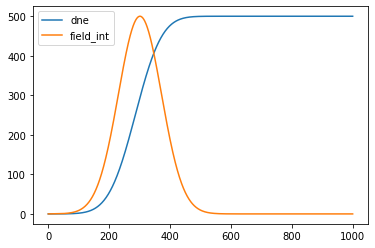

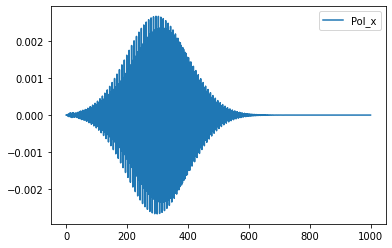

In [46]:
time = results['carriers']['time']
elec = results['carriers']['dne']
field_int = results['external_field']['Intensity']
pol = results['polarization']['Pol_x']

ratio = max(field_int)/max(elec)

plt.plot(time,ratio*elec,label='dne')
plt.plot(time,field_int,label='field_int')
plt.legend()
plt.show()

plt.plot(time,pol,label='Pol_x')
plt.legend()

Again we can access to the results using the attribute syntax. For instance if we are intersted to the spin_magnetization
part of the resutls we can set

In [47]:
spin_results = U.AttributeDict(**results['spin_magnetization'])

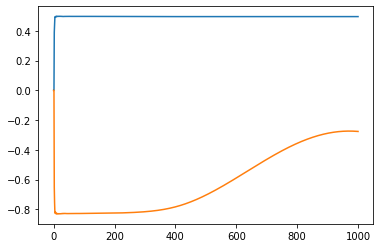

In [48]:
plt.plot(spin_results.time,spin_results.Mc_z)
plt.plot(spin_results.time,spin_results.Mv_z)

###  YamboOutputParser for a ypp computation

We test the functionality of the Parser to deal with the output of a ypp -s b computation for plotting the bands structure along a path

In [76]:
bands_output = ['YamboCalculator_test/bands_test1/o-bands_test1.bands_interpolated']

In [77]:
results = P.YamboOutputParser(bands_output)

For instance

In [78]:
results['bands_interpolated']['col0'] # kpath

array([0.        , 0.02296918, 0.04593835, 0.06890753, 0.09187671,
       0.11484589, 0.13781506, 0.16078424, 0.18375342, 0.2067226 ,
       0.22969177, 0.25266095, 0.27563013, 0.2985993 , 0.32156848,
       0.34453766, 0.36750684, 0.39047601, 0.41344519, 0.43641437,
       0.45938355, 0.48235272, 0.5053219 , 0.52829108, 0.55088434,
       0.57347759, 0.59607085, 0.61866411, 0.64125737, 0.66385063,
       0.68644389, 0.70903715, 0.73163041, 0.75422367, 0.77681692,
       0.79941018, 0.82200344, 0.8445967 , 0.86718996, 0.88978322,
       0.91237648, 0.93496974, 0.957563  , 0.98015626, 1.00274951,
       1.02534277, 1.04793603, 1.07052929, 1.09312255, 1.11571581,
       1.13830907, 1.1617713 , 1.18523353, 1.20869576, 1.23215799,
       1.25562022, 1.27908245, 1.30254468, 1.32600691, 1.34946914,
       1.37293137, 1.3963936 , 1.41985583, 1.44331806, 1.46605209,
       1.48878612, 1.51152015, 1.53425418, 1.5569882 , 1.57972223,
       1.60245626, 1.62519029, 1.64792432, 1.67065835, 1.69339

In [79]:
results['bands_interpolated']['col1'] # energies of the first band included in the computation

array([-6.92244006e+00, -6.89456750e+00, -6.80905005e+00, -6.66256275e+00,
       -6.45506597e+00, -6.19239804e+00, -5.88499915e+00, -5.54470821e+00,
       -5.18230107e+00, -4.80669380e+00, -4.42520939e+00, -4.04376626e+00,
       -3.66578563e+00, -3.28979422e+00, -2.90838764e+00, -2.51212605e+00,
       -2.09766393e+00, -1.67347735e+00, -1.25737543e+00, -8.68891659e-01,
       -5.25931945e-01, -2.49064080e-01, -6.50615745e-02, -3.77496810e-06,
       -6.29556139e-02, -2.36496842e-01, -4.82668963e-01, -7.58747799e-01,
       -1.03304555e+00, -1.29174174e+00, -1.53792606e+00, -1.78627954e+00,
       -2.05464117e+00, -2.35405922e+00, -2.68236701e+00, -3.02622904e+00,
       -3.37018860e+00, -3.70516988e+00, -4.03055233e+00, -4.35110015e+00,
       -4.67381504e+00, -5.00667217e+00, -5.35699357e+00, -5.72799830e+00,
       -6.11577549e+00, -6.50923119e+00, -6.89170878e+00, -7.24099965e+00,
       -7.52809606e+00, -7.71962799e+00, -7.78724231e+00, -7.76161105e+00,
       -7.69613277e+00, -

The parser cannot determine the names of the columns because the number of colums depend on the
number of bands considered. The meaning of the columns can be identified by knowing the input used to 
perform the post processing. 

In [80]:
r = results['bands_interpolated']
kpath = r['col0']
band3 = r['col1']
band4 = r['col2']
band5 = r['col3']
band6 = r['col4']

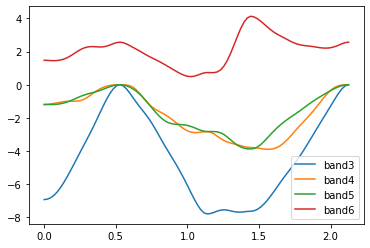

In [81]:
plt.plot(kpath,band3,label='band3')
plt.plot(kpath,band4,label='band4')
plt.plot(kpath,band5,label='band5')
plt.plot(kpath,band6,label='band6')
plt.legend()

## Analysis of the YamboDipolesParser class

To analyze the YamboDipolesParser we build the dipoles using Yambo. We start from a nscf
computation on GaAs on a regular grid with 12 bands (8 full and 4 empties, since the bands
are spin splitted)

In [218]:
source_dir = 'Pw_bands/gaas_nscf_so.save'
run_dir = 'YamboParser_test/DipolesParser'

In [219]:
U.build_SAVE(source_dir,run_dir)

Create folder YamboParser_test/DipolesParser
Executing command: cd Pw_bands/gaas_nscf_so.save; p2y -a 2
Create a symlink of /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf_so.save/SAVE in YamboParser_test/DipolesParser
Executing command: cd YamboParser_test/DipolesParser;OMP_NUM_THREADS=1 yambo


In [220]:
inp = I.YamboInput(args='yambo -dipoles -V all',folder=run_dir)
inp['variables']['DipComputed'] = 'R P V Spin'
inp['arguments'].append("DipBandsALL")
inp

{'args': 'yambo -dipoles -V all',
 'folder': 'YamboParser_test/DipolesParser',
 'filename': 'yambo.in',
 'arguments': ['DipBandsALL'],
 'variables': {'StdoHash': [40.0, ''],
  'Nelectro': [8.0, ''],
  'ElecTemp': [0.0, 'eV'],
  'BoseTemp': [-1.0, 'eV'],
  'OccTresh': [1e-05, ''],
  'NLogCPUs': [0.0, ''],
  'DIP_Threads': [0.0, ''],
  'DBsIOoff': 'none',
  'DBsFRAGpm': 'none',
  'PAR_def_mode': 'balanced',
  'DipComputed': 'R P V Spin',
  'DipBands': [[1, 12], '']}}

Note that the options ``DipBandsALL`` enables the computation of the dipoles elements among all the bands, and not
only in for the full-empty couples

In [221]:
code.run(input=inp,run_dir=run_dir,name='dipoles',mpi=1,skip=False)

run command: cd YamboParser_test/DipolesParser; mpirun -np 1 yambo -F dipoles.in -J dipoles -C dipoles
computation dipoles is running...
computation dipoles ended

            There are no o-* files.
            Maybe you have performed a ypp computation or wait_end_run and/or
            the dry_run option are active?
            Otherwise a possible error has occured during the computation
            


{'output': [],
 'dft': 'YamboParser_test/DipolesParser/SAVE/ns.db1',
 'dipoles': 'YamboParser_test/DipolesParser/dipoles/ndb.dipoles'}

Once that the computation is over, and the database is built by Yambo we parse it

In [222]:
dipole_file = os.path.join(run_dir,'dipoles/ndb.dipoles')

In [223]:
dipoles = P.YamboDipolesParser(dipole_file)

Parse file : YamboParser_test/DipolesParser/dipoles/ndb.dipoles
Spin dipoles not found in the ndb.dipoles


In [224]:
dipoles.get_info()

YamboDipolesParser variables structure
dip_r shape (16, 12, 12, 3, 2)
dip_v shape (16, 12, 12, 3, 2)
dip_spin shape (1,)


CHECK WHY THERE ARE NO DIP_spin VARIABLES!!!!!!!!!!

We consider the r dipole (x component) and look for the values of the valence->conduction
elements

In [225]:
dip_r = dipoles.dip_r

In [226]:
for k in range(len(dip_r)):
    print('dipole for optical transtion at',k,dip_r[k][7][8][0])
    print('dipole for optical transtion at',k,dip_r[k][8][7][0])

dipole for optical transtion at 0 [19.13476049 10.65663503]
dipole for optical transtion at 0 [-19.13476049  10.65663503]
dipole for optical transtion at 1 [-2.09054215 -2.24485556]
dipole for optical transtion at 1 [ 2.09054215 -2.24485556]
dipole for optical transtion at 2 [0.80568719 0.68118405]
dipole for optical transtion at 2 [-0.80568719  0.68118405]
dipole for optical transtion at 3 [3.04190316 2.05448711]
dipole for optical transtion at 3 [-3.04190316  2.05448711]
dipole for optical transtion at 4 [-1.81764062  0.16555573]
dipole for optical transtion at 4 [1.81764062 0.16555573]
dipole for optical transtion at 5 [ 1.97735684 -2.25344249]
dipole for optical transtion at 5 [-1.97735684 -2.25344249]
dipole for optical transtion at 6 [ 3.17351199 -0.92622537]
dipole for optical transtion at 6 [-3.17351199 -0.92622537]
dipole for optical transtion at 7 [ 1.12316434 -3.38338401]
dipole for optical transtion at 7 [-1.12316434 -3.38338401]
dipole for optical transtion at 8 [-0.382286

CHECK : WHICH IS THE REAL AND WHICH THE IMAGINARY PART?

WHICH IS THE DEFINITION of THE iR OPERATOR?..it is antihermitian....

We also compute the transition dipoles in the first spin-splitted conduction bands

In [227]:
for k in range(len(dip_r)):
    print('dipole for optical transtion at',k,dip_r[k][8][9][0])

dipole for optical transtion at 0 [0. 0.]
dipole for optical transtion at 1 [0. 0.]
dipole for optical transtion at 2 [0. 0.]
dipole for optical transtion at 3 [0. 0.]
dipole for optical transtion at 4 [0. 0.]
dipole for optical transtion at 5 [ 3.19848985 -5.73704325]
dipole for optical transtion at 6 [-2.12489731  6.41916483]
dipole for optical transtion at 7 [ 5.58888916 -1.38856218]
dipole for optical transtion at 8 [-1.35303055  5.16321935]
dipole for optical transtion at 9 [0. 0.]
dipole for optical transtion at 10 [ 11.32338459 -66.28915676]
dipole for optical transtion at 11 [  6.09155083 -11.36427652]
dipole for optical transtion at 12 [0. 0.]
dipole for optical transtion at 13 [-1.58889318 -0.65063289]
dipole for optical transtion at 14 [2.79217099 0.63322764]
dipole for optical transtion at 15 [6.74899276e-05 2.49874911e-04]


## Analysis of the YamboDftParser class

This database collects information about the lattice and electronic properties
of the system.

The information codified in this database are usually equivalent to the ones in the QuantumESPRESSO
data-file-schema.xml and the YamboDftParser shares many common functions with the PwParser.

As a first test we consider a Pw nscf computation for GaAs and build the SAVE folder with Yambo

In [4]:
source_dir = 'Pw_bands/gaas_nscf_so.save'
run_dir = 'YamboParser_test/DipolesParser'

We create the Yambo SAVE using the function of the Utilities module

In [233]:
U.build_SAVE(source_dir=source,run_dir=run_dir)

SAVE folder already present in YamboParser_test/DipolesParser. No operations performed.


We also make a fixsymm to study the content of the ns.db1 database after the fixsym procedure

In [235]:
U.make_FixSymm(run_dir)

Perform the fixSymm in the folder YamboParser_test/DipolesParser
Initialize a Yambo calculator with scheduler direct
run command: cd YamboParser_test/DipolesParser; mpirun -np 1 ypp -F FixSymm.in -J FixSymm -C FixSymm
computation FixSymm is running...
computation FixSymm ended

            There are no o-* files.
            Maybe you have performed a ypp computation or wait_end_run and/or
            the dry_run option are active?
            Otherwise a possible error has occured during the computation
            


We parse the ns.db1 databases in the SAVE folders, with and without fixsym procedure. 

We also parse the Pw data-file-schema.xml to compare the output of the two

In [7]:
xml = os.path.join(source_dir,'data-file-schema.xml')
nsdb = os.path.join(run_dir,'SAVE','ns.db1')
nsdb_fixsymm = os.path.join(run_dir,'FixSymm','SAVE','ns.db1')

In [9]:
pw_data = P.PwParser(xml)
yambo_data = P.YamboDftParser(nsdb)
yambo_data_fixsym = P.YamboDftParser(nsdb_fixsymm)

Parse file : Pw_bands/gaas_nscf_so.save/data-file-schema.xml
Parse file : YamboParser_test/DipolesParser/SAVE/ns.db1
Parse file : YamboParser_test/DipolesParser/FixSymm/SAVE/ns.db1


We comment on the meaning of some of the attributes of the classes 

The number of kpoints (actually in the IBZ since they are reduced by the symmetries of the lattice). If the fixsymm is performed
only the simmetries preserved by the external field are mantained

In [238]:
print(pw_data.nkpoints)
print(yambo_data.nkpoints)
print(yambo_data_fixsym.nkpoints)

16
16
75


In [240]:
print(len(yambo_data.sym))
print(len(yambo_data_fixsym.sym))

48
4


We compare the values of members and methods in the various cases

In [242]:
pw_data.kpoints

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  1.66666667e-01, -1.66666667e-01],
       [-3.33333333e-01,  3.33333333e-01, -3.33333333e-01],
       [ 5.00000000e-01, -5.00000000e-01,  5.00000000e-01],
       [ 0.00000000e+00,  3.33333333e-01,  0.00000000e+00],
       [-1.66666667e-01,  5.00000000e-01, -1.66666667e-01],
       [ 6.66666667e-01, -3.33333333e-01,  6.66666667e-01],
       [ 5.00000000e-01, -1.66666667e-01,  5.00000000e-01],
       [ 3.33333333e-01,  2.77555756e-17,  3.33333333e-01],
       [ 0.00000000e+00,  6.66666667e-01,  0.00000000e+00],
       [ 8.33333333e-01, -1.66666667e-01,  8.33333333e-01],
       [ 6.66666667e-01, -5.55111512e-17,  6.66666667e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 6.66666667e-01, -3.33333333e-01,  1.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01,  8.33333333e-01],
       [-3.33333333e-01, -1.00000000e+00,  0.00000000e+00]])

In [243]:
yambo_data.kpoints

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  1.66666667e-01, -1.66666667e-01],
       [-3.33333333e-01,  3.33333333e-01, -3.33333333e-01],
       [ 5.00000000e-01, -5.00000000e-01,  5.00000000e-01],
       [ 0.00000000e+00,  3.33333333e-01,  0.00000000e+00],
       [-1.66666667e-01,  5.00000000e-01, -1.66666667e-01],
       [ 6.66666667e-01, -3.33333333e-01,  6.66666667e-01],
       [ 5.00000000e-01, -1.66666667e-01,  5.00000000e-01],
       [ 3.33333333e-01,  2.77555756e-17,  3.33333333e-01],
       [ 0.00000000e+00,  6.66666667e-01,  0.00000000e+00],
       [ 8.33333333e-01, -1.66666667e-01,  8.33333333e-01],
       [ 6.66666667e-01, -5.55111512e-17,  6.66666667e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 6.66666667e-01, -3.33333333e-01,  1.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01,  8.33333333e-01],
       [-3.33333333e-01, -1.00000000e+00,  0.00000000e+00]])

In [245]:
yambo_data_fixsym.kpoints[0:25]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  1.66666667e-01, -1.66666667e-01],
       [-3.33333333e-01,  3.33333333e-01, -3.33333333e-01],
       [ 5.00000000e-01, -5.00000000e-01,  5.00000000e-01],
       [ 0.00000000e+00,  3.33333333e-01,  0.00000000e+00],
       [-1.66666667e-01,  5.00000000e-01, -1.66666667e-01],
       [ 6.66666667e-01, -3.33333333e-01,  6.66666667e-01],
       [ 5.00000000e-01, -1.66666667e-01,  5.00000000e-01],
       [ 3.33333333e-01,  2.77555756e-17,  3.33333333e-01],
       [ 0.00000000e+00,  6.66666667e-01,  0.00000000e+00],
       [ 8.33333333e-01, -1.66666667e-01,  8.33333333e-01],
       [ 6.66666667e-01, -5.55111512e-17,  6.66666667e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 6.66666667e-01, -3.33333333e-01,  1.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01,  8.33333333e-01],
       [-3.33333333e-01, -1.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01

In [246]:
pw_data.get_evals(set_gap=1.42)[0]

Apply a scissor of 1.0019927808361082 eV


array([-1.28100839e+01, -1.28100839e+01, -3.56650776e-01, -3.56650776e-01,
       -3.20579119e-11, -3.20579119e-11, -2.99191782e-11,  0.00000000e+00,
        1.42000000e+00,  1.42000000e+00,  4.56612389e+00,  4.56612390e+00])

In [247]:
yambo_data.get_evals(set_gap=1.42)[0]

Apply a scissor of 1.0019927808361082 eV


array([-1.28100839e+01, -1.28100839e+01, -3.56650776e-01, -3.56650776e-01,
       -3.20579119e-11, -3.20579119e-11, -2.99191782e-11,  0.00000000e+00,
        1.42000000e+00,  1.42000000e+00,  4.56612389e+00,  4.56612390e+00])

In [248]:
yambo_data_fixsym.get_evals(set_scissor=1.19446036)[40]

Apply a scissor of 1.19446036 eV


array([-12.04885542, -12.04788568,  -4.27347246,  -4.24121973,
        -2.21835426,  -2.15893974,  -0.61692605,  -0.61296675,
         3.62174379,   3.68750566,   5.54786061,   5.60369709])

In [249]:
pw_data.get_gap()

Direct gap system
Gap : 0.4180072191638917 eV


{'gap': 0.4180072191638917,
 'direct_gap': 0.4180072191638917,
 'position_cbm': 0,
 'positon_vbm': 0}

In [250]:
yambo_data.get_gap()

Direct gap system
Gap : 0.4180072191638917 eV


{'gap': 0.4180072191638917,
 'direct_gap': 0.4180072191638917,
 'position_cbm': 0,
 'positon_vbm': 0}

In [262]:
pw_data.get_transitions(initial=[6,7],final=[8,9])[0]

array([0.41800722, 0.41800722, 0.41800722, 0.41800722])

In [263]:
pw_data.get_transitions(initial=[6,7],final=[8,9])[0]

array([0.41800722, 0.41800722, 0.41800722, 0.41800722])

We perform the comparison also for a ``bands`` computation in which the kpoints are
defined in QuantumESPRESSO using the `tpiba_b` option that correspond to cartesian
coordinates in units of $2\pi/a_{lat}$.

In [8]:
source_dir = 'Pw_bands/gaas_bands.save'
run_dir = 'YamboParser_test/DftParser_bands'

We create the Yambo SAVE using the function of the Utilities module

In [14]:
U.build_SAVE(source_dir=source_dir,run_dir=run_dir)

Create folder YamboParser_test/DftParser_bands
Executing command: cd Pw_bands/gaas_bands.save; p2y -a 2
Create a symlink of /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_bands.save/SAVE in YamboParser_test/DftParser_bands
Executing command: cd YamboParser_test/DftParser_bands;OMP_NUM_THREADS=1 yambo


In [15]:
xml = os.path.join(source_dir,'data-file-schema.xml')
nsdb = os.path.join(run_dir,'SAVE','ns.db1')

In [16]:
pw_data = P.PwParser(xml)
yambo_data = P.YamboDftParser(nsdb)

Parse file : Pw_bands/gaas_bands.save/data-file-schema.xml
Parse file : YamboParser_test/DftParser_bands/SAVE/ns.db1


In [17]:
pw_data.kpoints[0:10]

array([[0.5       , 0.5       , 0.5       ],
       [0.48333333, 0.48333333, 0.48333333],
       [0.46666667, 0.46666667, 0.46666667],
       [0.45      , 0.45      , 0.45      ],
       [0.43333333, 0.43333333, 0.43333333],
       [0.41666667, 0.41666667, 0.41666667],
       [0.4       , 0.4       , 0.4       ],
       [0.38333333, 0.38333333, 0.38333333],
       [0.36666667, 0.36666667, 0.36666667],
       [0.35      , 0.35      , 0.35      ]])

In [18]:
yambo_data.kpoints[:10]

array([[0.5       , 0.5       , 0.5       ],
       [0.48333333, 0.48333333, 0.48333333],
       [0.46666667, 0.46666667, 0.46666667],
       [0.45      , 0.45      , 0.45      ],
       [0.43333333, 0.43333333, 0.43333333],
       [0.41666667, 0.41666667, 0.41666667],
       [0.4       , 0.4       , 0.4       ],
       [0.38333333, 0.38333333, 0.38333333],
       [0.36666667, 0.36666667, 0.36666667],
       [0.35      , 0.35      , 0.35      ]])

We observe that the kpoints stored in the two parser are identical

We perform a further test with random $k$ points, specified in QuantumESPRESSO
with the `tpiba` option. We compare the xml and ns.db1 database generated with the
usual procedure

In [19]:
pw_data = P.PwParser('YamboParser_test/random_grids/data-file-schema.xml')
yambo_data = P.YamboDftParser('YamboParser_test/random_grids/ns.db1')

Parse file : YamboParser_test/random_grids/data-file-schema.xml
Parse file : YamboParser_test/random_grids/ns.db1


In [20]:
pw_data.kpoints[0:10]

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00],
       [-8.464520e-03,  1.853640e-03, -7.024630e-03],
       [ 9.818610e-03,  1.500391e-02,  1.478666e-02],
       [-5.753930e-03,  3.050000e-06, -1.735204e-02],
       [ 1.502407e-02,  8.102160e-03,  5.387760e-03],
       [ 9.094310e-03,  3.194920e-03, -6.427010e-03],
       [-8.042640e-03,  9.642650e-03, -1.917115e-02],
       [ 7.458350e-03, -1.704125e-02, -1.992032e-02],
       [ 1.077130e-02, -1.945781e-02, -1.781570e-03],
       [ 1.246368e-02,  1.388959e-02,  1.070112e-02]])

In [21]:
yambo_data.kpoints[0:10]

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00],
       [-8.464520e-03,  1.853640e-03, -7.024630e-03],
       [ 9.818610e-03,  1.500391e-02,  1.478666e-02],
       [-5.753930e-03,  3.050000e-06, -1.735204e-02],
       [ 1.502407e-02,  8.102160e-03,  5.387760e-03],
       [ 9.094310e-03,  3.194920e-03, -6.427010e-03],
       [-8.042640e-03,  9.642650e-03, -1.917115e-02],
       [ 7.458350e-03, -1.704125e-02, -1.992032e-02],
       [ 1.077130e-02, -1.945781e-02, -1.781570e-03],
       [ 1.246368e-02,  1.388959e-02,  1.070112e-02]])

Again the $k$ points are the same.

In [ ]:
######################################

In [4]:
import numpy as np
import os

In [35]:
source_dir = 'Pw_bands/gaas_nscf_so.save'
run_dir = 'YamboParser_test/DipolesParser'

In [36]:
xml = os.path.join(source_dir,'data-file-schema.xml')
nsdb = os.path.join(run_dir,'SAVE','ns.db1')

In [49]:
pw_data = P.PwParser(xml)
yambo_data = P.YamboDftParser(nsdb)

Parse file : Pw_bands/gaas_nscf_so.save/data-file-schema.xml
Parse file : YamboParser_test/DipolesParser/SAVE/ns.db1


In [58]:
pw_data.kpoints

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  1.66666667e-01, -1.66666667e-01],
       [-3.33333333e-01,  3.33333333e-01, -3.33333333e-01],
       [ 5.00000000e-01, -5.00000000e-01,  5.00000000e-01],
       [ 0.00000000e+00,  3.33333333e-01,  0.00000000e+00],
       [-1.66666667e-01,  5.00000000e-01, -1.66666667e-01],
       [ 6.66666667e-01, -3.33333333e-01,  6.66666667e-01],
       [ 5.00000000e-01, -1.66666667e-01,  5.00000000e-01],
       [ 3.33333333e-01,  2.77555756e-17,  3.33333333e-01],
       [ 0.00000000e+00,  6.66666667e-01,  0.00000000e+00],
       [ 8.33333333e-01, -1.66666667e-01,  8.33333333e-01],
       [ 6.66666667e-01, -5.55111512e-17,  6.66666667e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 6.66666667e-01, -3.33333333e-01,  1.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01,  8.33333333e-01],
       [-3.33333333e-01, -1.00000000e+00,  0.00000000e+00]])

In [51]:
pw_data.lattice

array([[-5.3385,  0.    ,  5.3385],
       [ 0.    ,  5.3385,  5.3385],
       [-5.3385,  5.3385,  0.    ]])

In [52]:
a1,a2,a3 = pw_data.lattice
a2

array([0.    , 5.3385, 5.3385])

In [53]:
pw_data.get_lattice_volume()

304.29003968325

In [54]:
pw_data.atomic_positions

[['Ga', [0.0, 0.0, 0.0]], ['As', [-2.66925, 2.66925, 2.66925]]]

In [55]:
yambo_data.alat

array([10.677, 10.677, 10.677])

In [56]:
yambo_data.lat

array([[-5.3385,  0.    ,  5.3385],
       [ 0.    ,  5.3385,  5.3385],
       [-5.3385,  5.3385,  0.    ]])

In [57]:
yambo_data.kpoints

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  1.66666667e-01, -1.66666667e-01],
       [-3.33333333e-01,  3.33333333e-01, -3.33333333e-01],
       [ 5.00000000e-01, -5.00000000e-01,  5.00000000e-01],
       [ 0.00000000e+00,  3.33333333e-01,  0.00000000e+00],
       [-1.66666667e-01,  5.00000000e-01, -1.66666667e-01],
       [ 6.66666667e-01, -3.33333333e-01,  6.66666667e-01],
       [ 5.00000000e-01, -1.66666667e-01,  5.00000000e-01],
       [ 3.33333333e-01,  2.77555756e-17,  3.33333333e-01],
       [ 0.00000000e+00,  6.66666667e-01,  0.00000000e+00],
       [ 8.33333333e-01, -1.66666667e-01,  8.33333333e-01],
       [ 6.66666667e-01, -5.55111512e-17,  6.66666667e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 6.66666667e-01, -3.33333333e-01,  1.00000000e+00],
       [ 5.00000000e-01, -1.66666667e-01,  8.33333333e-01],
       [-3.33333333e-01, -1.00000000e+00,  0.00000000e+00]])

In [37]:
10.677/2.

5.3385

In [65]:
1.1%1

0.10000000000000009

In [64]:
-1.1%1

0.8999999999999999

In [59]:
a1,a2,a3 = yambo_data.lat
a1

array([-5.3385,  0.    ,  5.3385])

In [86]:
v = np.dot(a1,np.cross(a2,a3))
v

304.29003968325

In [87]:
b1 = 2*np.pi*np.cross(a2,a3)/v
b2 = 2*np.pi*np.cross(a3,a1)/v
b3 = 2*np.pi*np.cross(a1,a2)/v

In [88]:
np.dot(b1,np.cross(b2,b3))

0.815176907205395

In [89]:
(2*np.pi)**3/v

0.8151769072053947

In [76]:
b1 = np.cross(a2,a3)/v
b2 = np.cross(a3,a1)/v
b3 = np.cross(a1,a2)/v

In [81]:
R = a1+a2+27*a3

In [82]:
np.dot(R,b2)

6.283185307179587

In [83]:
alat = yambo_data.alat[0]
b1_red = alat/(2*np.pi)*b1
b2_red = alat/(2*np.pi)*b2
b3_red = alat/(2*np.pi)*b3

In [84]:
b3_red

array([-1.,  1., -1.])

In [85]:
np.dot(b1_red,np.cross(b2_red,b3_red))

4.000000000000003

In [57]:
lat = yambo_data.lat
lat

array([[-5.3385,  0.    ,  5.3385],
       [ 0.    ,  5.3385,  5.3385],
       [-5.3385,  5.3385,  0.    ]])

In [62]:
p_cart = np.array([0,1,1])
p_crys = np.linalg.solve(np.array(lat).T,p_cart)
p_crys

array([ 1.03982675e-17,  1.87318535e-01, -1.03982675e-17])

In [63]:
p_crys[0]*lat[0]+p_crys[1]*lat[1]+p_crys[2]*lat[2]

array([0., 1., 1.])